In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [4]:
# Function that creates the X matrix as defined for fitting our model
def create_X(x,deg):
    X = np.ones((len(x),deg+1))
    for i in range(1,deg+1):
        X[:,i] = x**i
    return X

# Function for predicting the response
def predict_y(x,beta):
    return np.dot(create_X(x,len(beta)-1),beta)

# Function for fitting the model
def fit_beta(df,deg):
    return np.linalg.lstsq(create_X(df.x,deg),df.y,rcond=None)[0]

# Function for computing the MSE
def mse(y,yPred):
    return np.mean((y-yPred)**2)

In [11]:
# Loading training, validation and test data
dfTrain = pandas.read_csv('Data_Train.csv')
dfVal = pandas.read_csv('Data_Val.csv')
dfTest = pandas.read_csv('Data_Test.csv')
print(dfTrain.head())
############ TRAINING A MODEL

          x         y
0  0.945160  1.088484
1  0.990309  0.924173
2  0.357079  0.360257
3  0.132520  0.026978
4  0.017260  0.098719


In [70]:
# Fitting model
deg = 1
X = create_X(dfTrain.x,deg)
beta = fit_beta(dfTrain,deg)
print(beta)
#print(X)

[-0.00657061  1.22354401]


In [71]:
# Computing training error
yPredTrain = predict_y(dfTrain.x,beta)
err = mse(dfTrain.y,yPredTrain)
print('Training Error = {:2.3}'.format(err))

# Computing test error
yPredTest = predict_y(dfTest.x,beta)
err = mse(dfTest.y,yPredTest)
print('Test Error = {:2.3}'.format(err))
#print(dfTrain.head())
#print(create_X(dfTrain.x,2))

Training Error = 0.0258
Test Error = 0.0154


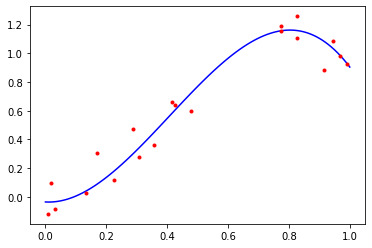

In [92]:
############ PLOTTING FITTED MODEL
x = np.linspace(0,1,100)
y = predict_y(x,beta)

plt.plot(x,y,'b-',dfTrain.x,dfTrain.y,'r.')
plt.show()

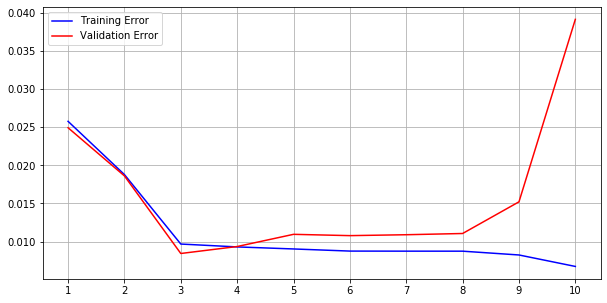

In [93]:
############ HYPER-PARAMETER TUNING

# Initializing range of degree values to be tested and errors
degRange = list(range(1,11))
errTrain = np.zeros(len(degRange))
errVal = np.zeros(len(degRange))

# Computing error as a function of degree
# ...
for i in degRange:
    #Get Beta
    beta = fit_beta(dfTrain,i)
    #Calculate Training Error
    yPredTrain = predict_y(dfTrain.x,beta)
    err = mse(dfTrain.y,yPredTrain)
    errTrain[i-1] = err
    #Calculate Validation Error
    yPredVal = predict_y(dfVal.x,beta)
    err = mse(dfVal.y,yPredVal)
    errVal[i-1] = err
    
    
# Plotting training and validation errors
plt.figure(figsize = (10,5))
plt.plot(degRange,errTrain,'b-',degRange,errVal,'r-')
plt.grid(True)
plt.xticks(degRange)
plt.legend(('Training Error','Validation Error'))
plt.show()

In [94]:
############ TRAINING SELECTED MODEL

# Concatenating data training and validation data frames

df = pd.concat([dfTrain, dfVal])

# Fit model using the optimal degree found in the previous cell
degOpt = 3
beta = fit_beta(df,degOpt)

# Compute and print training and test errors
yPredTrain = predict_y(df.x,beta)
err = mse(df.y,yPredTrain)
print('Training Error = {:2.3}'.format(err))

# Computing test error
yPredTest = predict_y(dfTest.x,beta)
err = mse(dfTest.y,yPredTest)
print('Test Error = {:2.3}'.format(err))

Training Error = 0.0087
Test Error = 0.0108


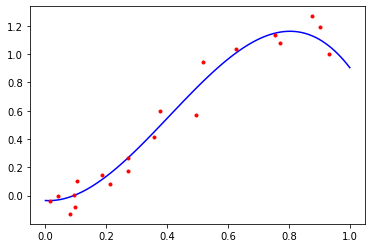

In [95]:
############ PLOTTING FITTED MODEL
# Plot the fitted model as in the second cell
x = np.linspace(0,1,100)
y = predict_y(x,beta)

plt.plot(x,y,'b-',dfVal.x,dfVal.y,'r.')
plt.show()